<a href="https://colab.research.google.com/github/shivam-cse/CS-306-Machine-Learning-Work/blob/main/Lab7_new/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import warnings

##**Implement the perceptron algorithm for OR logic gate with 2-bit binary input.Finally report the overall accuracy on training samples**

In [ ]:

def threshold(z):
    # Activation function
    y = np.ones(z.shape[0])
    for i in range(z.shape[0]):
      if(z[i] >= 0):
        y[i] = 1
      else:
        y[i] = 0
    return y

def sigmoid(z):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-z))


def predict_threshold(weights, X):
  linear_model = np.dot(X, weights)
  y_predicted_cls = threshold(linear_model)
  return np.array(y_predicted_cls)

 
def model_analysis(x_test, y_test, weight):
  x_test = add_intercept(x_test)
  y_pred = np.ones(y_test.shape[0])
  hypothesis = np.dot(x_test, weight.T)
  for i in range(0, hypothesis.shape[0]):
    if (hypothesis[i] < 0):
      y_pred[i] = 0
    if (hypothesis[i]>=0):
      y_pred[i] = 1
  test_acc = accuracy_score(y_test, y_pred)*100
  precision = precision_score(y_test, y_pred)*100
  recall = recall_score(y_test, y_pred)*100
  # f1 = f1_score(y_test, y_pred)*100
  print("Training Accuracy: ", test_acc)
  print("Prescission Score:", precision)
  print("Recall Score : ", recall) 
  # print('F1 Score : ', f1)
  print('Confusion Matrix : \n' + str(confusion_matrix(y_test, y_pred)))
  print("Classification Report for 3-classes: ")
  print(classification_report(y_test, y_pred))
  return test_acc

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred)
    accuracy = accuracy/len(y_true)
    return accuracy   


def add_intercept(x):
  intercept = np.ones((x.shape[0], 1))
  return np.concatenate((intercept, x), axis=1)

def perceptron(X, y_true):
    X = add_intercept(X)
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    # weights = np.ones(shape=(number_of_features)) 
    weights = np.array([0.1, 0.1, 0.1])
    total_samples = X.shape[0]
    converged  = True
    x_train, y_train = shuffle(X, y_true)  # shuffel the training sample
    idx = random.randint(0, x_train.shape[0]-1)
    epoch = 1
    used_index = []
    while converged:
        print("epoch: ", epoch)
        y_predicted = np.dot(x_train[idx], weights)
        # print("pred = ", y_predicted)

        if(y_train[idx] == 1 and y_predicted < 0):
          weights = weights + x_train[idx]

        if(y_train[idx] == 0 and y_predicted >= 0):
          weights = weights - x_train[idx]

        idx = random.randint(0, x_train.shape[0]-1)     # pick the random sample
        used_index.append(idx)

        if (len(set(used_index)) == x_train.shape[0]):
          # now check what is the accuracy now
          y_pred = predict_threshold(weights, x_train)
          # score = accuracy(y_true, y_pred)
          score = accuracy_score(y_train, y_pred)
          # score = predict(x_train, y_train, weights)
          if (score*100==100):
              print("Succefully Converged:")
              converged = False
        epoch = epoch + 1
    return weights



In [ ]:
x_train = np.array([[0, 1], [1, 1], [0, 0], [1, 0]])
y_train = np.array([1, 1, 0, 1])
weight  = perceptron(x_train, y_train)
print(weight)
acu = model_analysis(x_train, y_train, weight)

epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
Succefully Converged:
[-0.9  1.1  1.1]
Training Accuracy:  100.0
Prescission Score: 100.0
Recall Score :  100.0
Confusion Matrix : 
[[1 0]
 [0 3]]
Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## **Solve multi-class classification for the Iris dataset using sigmoid neuron Finally report the class-wise accuracy,precision, recall on training and testing samples.**

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:

def threshold(z):
    # Activation function
    y = np.ones(z.shape[0])
    for i in range(z.shape[0]):
      if(z[i] >= 0.5):
        y[i] = 1
      else:
        y[i] = 0
    return y

def sigmoid(z):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-z))


def predict_threshold(weights, X):
  linear_model = np.dot(X, weights)
  y_predicted_cls = threshold(sigmoid(linear_model))
  return np.array(y_predicted_cls)

 
def model_analysis(x_test, y_test, weight):
  x_test = add_intercept(x_test)
  y_pred = np.ones(y_test.shape[0])
  hypothesis = sigmoid(np.dot(x_test, weight.T))
  for i in range(0, hypothesis.shape[0]):
    if (hypothesis[i] < 0.5):
      y_pred[i] = 0
    if (hypothesis[i]>=0.5):
      y_pred[i] = 1
  test_acc = accuracy_score(y_test, y_pred)*100
  # precision = precision_score(y_test, y_pred)*100
  # recall = recall_score(y_test, y_pred)*100
  # f1 = f1_score(y_test, y_pred)*100
  print("Training Accuracy: ", test_acc)
  # print("Prescission Score:", precision)
  # print("Recall Score : ", recall) 
  # print('F1 Score : ', f1)
  print('Confusion Matrix : \n' + str(confusion_matrix(y_test, y_pred)))
  print("Classification Report for 3-classes: ")
  print(classification_report(y_test, y_pred))
  return test_acc

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred)
    accuracy = accuracy/len(y_true)
    return accuracy   


def add_intercept(x):
  intercept = np.ones((x.shape[0], 1))
  return np.concatenate((intercept, x), axis=1)

def sigmoid_neuron(X, y_true):
    X = add_intercept(X)
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    weights = np.ones(shape=(number_of_features)) 
    # weights = np.array([0.1, 0.1, 0.1])
    total_samples = X.shape[0]
    converged  = True
    x_train, y_train = shuffle(X, y_true)  # shuffel the training sample
    idx = random.randint(0, x_train.shape[0]-1)
    epoch = 1
    used_index = []
    while converged and epoch <= 10:
        print("epoch: ", epoch)
        y_predicted = sigmoid(np.dot(x_train[idx], weights))
        # print("pred = ", y_predicted)

        if(y_train[idx] == 1 and y_predicted < 0.5):
          weights = weights + x_train[idx]

        if(y_train[idx] == 0 and y_predicted >= 0.5):
          weights = weights - x_train[idx]

        idx = random.randint(0, x_train.shape[0]-1)     # pick the random sample
        used_index.append(idx)

        if (len(set(used_index)) == x_train.shape[0]):
          # now check what is the accuracy now
          y_pred = predict_threshold(weights, x_train)
          # score = accuracy(y_true, y_pred)
          score = accuracy_score(y_train, y_pred)
          # score = predict(x_train, y_train, weights)
          if (score*100==100):
              print("Succefully Converged:")
              converged = False
        epoch = epoch + 1
    return weights



In [ ]:
X = iris.data
Y = iris.target
X, Y = shuffle(X, Y)
X = pd.DataFrame(X, columns=iris.feature_names)
print(X)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.2               2.7                3.9               1.4
1                  4.7               3.2                1.6               0.2
2                  6.2               2.9                4.3               1.3
3                  6.3               2.9                5.6               1.8
4                  4.8               3.0                1.4               0.1
..                 ...               ...                ...               ...
145                6.9               3.1                4.9               1.5
146                5.8               2.7                5.1               1.9
147                4.5               2.3                1.3               0.3
148                5.0               3.6                1.4               0.2
149                5.6               2.9                3.6               1.3

[150 rows x 4 columns]


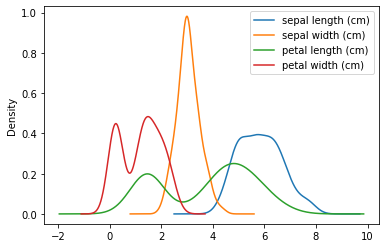

In [ ]:
X.plot.kde()

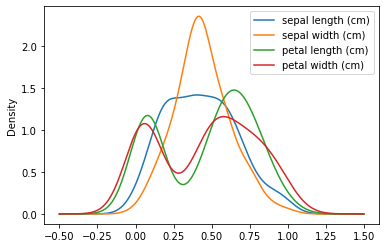

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
dataset_new = minmax.fit_transform(X)
X = pd.DataFrame(dataset_new, columns=iris.feature_names)
X.plot.kde()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
train_frac = 60/100  #60%   left ->: 100-60 = 40%
valid_frac = 20/40 #(100/70)*10
test_frac = 20/40 #(100/70)*60
print("total : ", X.shape)
x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=train_frac)
x_valid, x_test, y_valid,  y_test = train_test_split(x_rem, y_rem,  test_size=test_frac)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_valid.shape, y_valid.shape)

total :  (150, 4)
(90, 4) (90,)
(30, 4) (30,)
(30, 4) (30,)


In [ ]:
weight  = sigmoid_neuron(x_train, y_train)
print(weight)
acu = model_analysis(x_train, y_train, weight)